<font size='10'>**Customer Segmentation Using DBSCAN on Credit Card Data**</font>

**This project implements the DBSCAN clustering algorithm to segment credit card customers based on their transactional and behavioral data. The dataset includes features such as balances, purchase behaviors, cash advances, credit limits, payments, and tenure. The analysis aims to identify distinct customer groups and provide actionable insights for personalized marketing strategies and financial decision-making. The project explores data preprocessing, feature scaling, and parameter tuning to optimize the clustering results and includes a comprehensive visualization of the identified clusters.**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [37]:
df = pd.read_csv(r"C:\Users\jinil\Desktop\DBSCAN\Credit Card.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [39]:
df = df.drop(columns=['BALANCE_FREQUENCY', 
                      'PURCHASES_FREQUENCY', 
                      'ONEOFF_PURCHASES_FREQUENCY', 
                      'PURCHASES_INSTALLMENTS_FREQUENCY', 
                      'CASH_ADVANCE_FREQUENCY'])
df

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.250000,6


In [40]:
df.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,411.067645,978.871112,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,2136.634782,1659.887917,904.338115,2097.163877,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,361.280000,38.000000,89.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1110.130000,577.405000,468.637500,1113.821139,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 8950 non-null   object 
 1   BALANCE                 8950 non-null   float64
 2   PURCHASES               8950 non-null   float64
 3   ONEOFF_PURCHASES        8950 non-null   float64
 4   INSTALLMENTS_PURCHASES  8950 non-null   float64
 5   CASH_ADVANCE            8950 non-null   float64
 6   CASH_ADVANCE_TRX        8950 non-null   int64  
 7   PURCHASES_TRX           8950 non-null   int64  
 8   CREDIT_LIMIT            8949 non-null   float64
 9   PAYMENTS                8950 non-null   float64
 10  MINIMUM_PAYMENTS        8637 non-null   float64
 11  PRC_FULL_PAYMENT        8950 non-null   float64
 12  TENURE                  8950 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 909.1+ KB


In [42]:
df.duplicated().sum()

0

In [43]:
missing = pd.DataFrame(
    {
        'missing': df.isnull().sum(),
        'missing percentage': (df.isnull().sum()/len(df))*100
    }
    
)
missing

,missing,missing percentage
CUST_ID,0,0.000000
BALANCE,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
PURCHASES_TRX,0,0.000000
CREDIT_LIMIT,1,0.011173
PAYMENTS,0,0.000000


In [44]:
df = df.dropna(subset=['CREDIT_LIMIT']).reset_index(drop=True)

In [45]:
from sklearn.impute import SimpleImputer
min_payments_imputer = SimpleImputer(strategy='median')
df['MINIMUM_PAYMENTS'] = min_payments_imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

In [46]:
df.isnull().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

In [47]:
df.shape

(8949, 13)

In [48]:
x = df.select_dtypes(exclude=['object'])
x

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,312.452292,0.000000,6
8946,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.250000,6


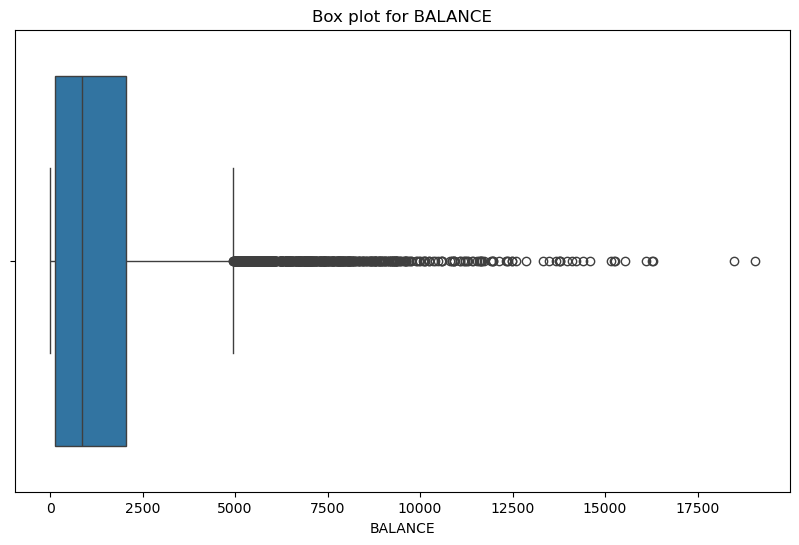

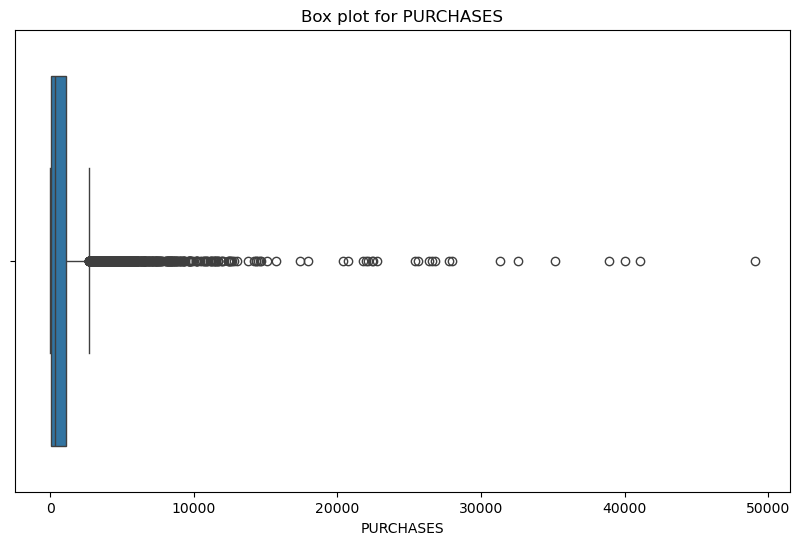

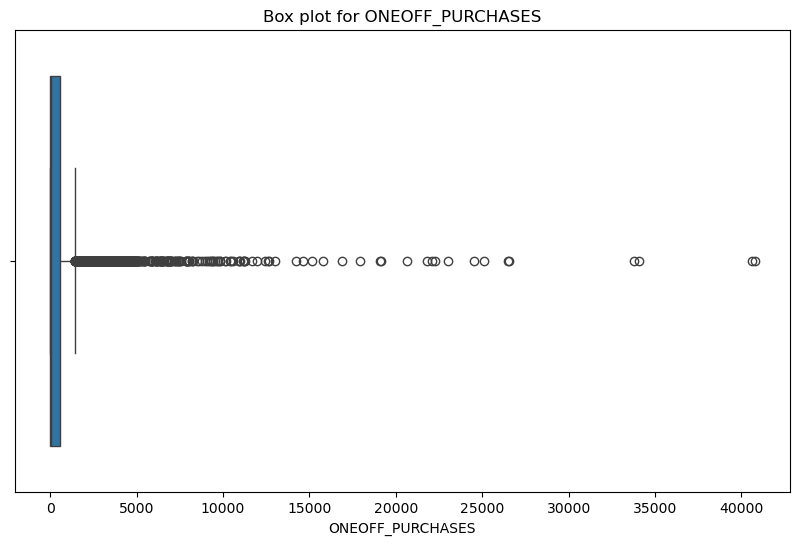

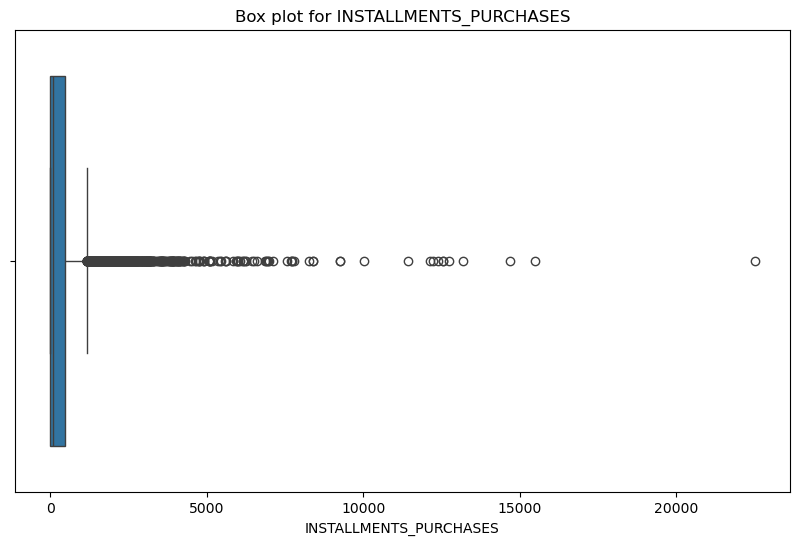

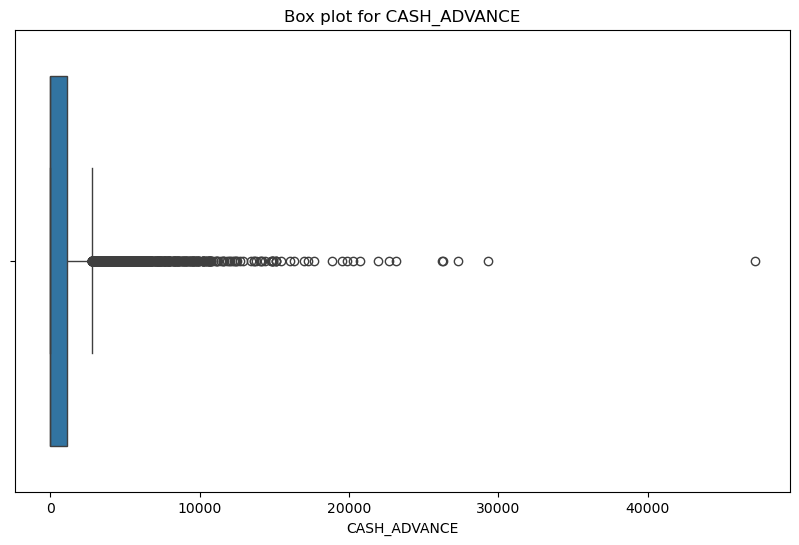

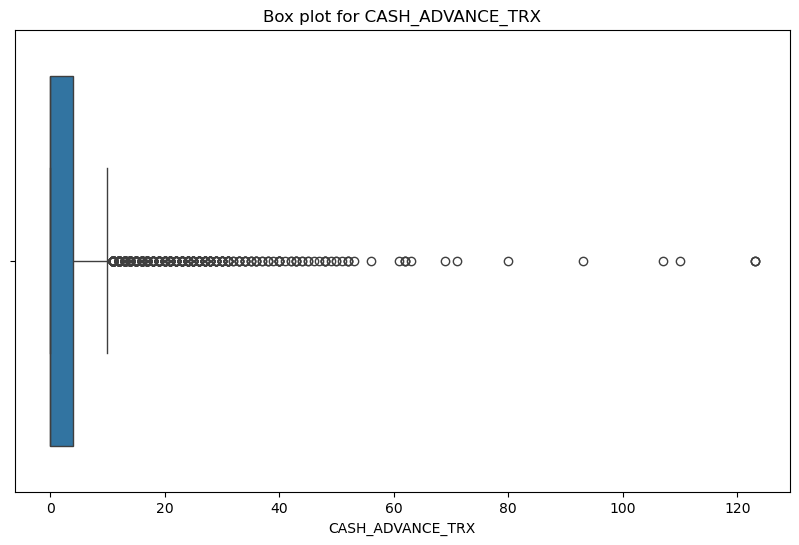

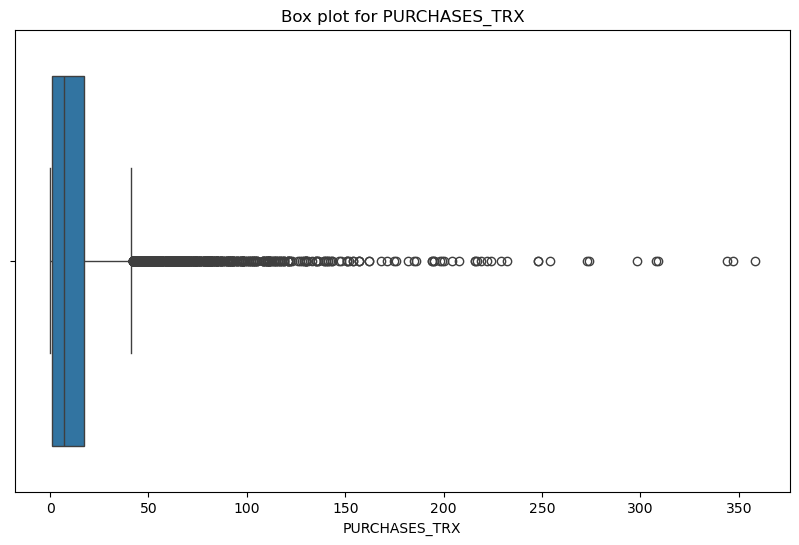

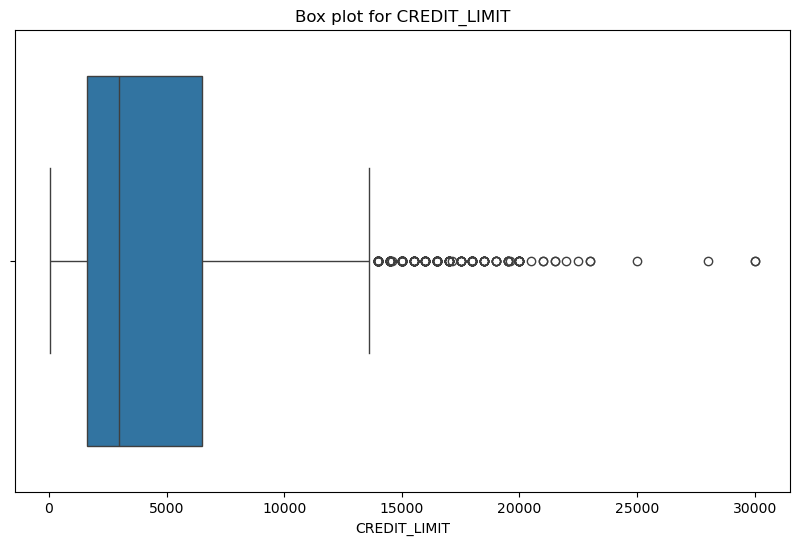

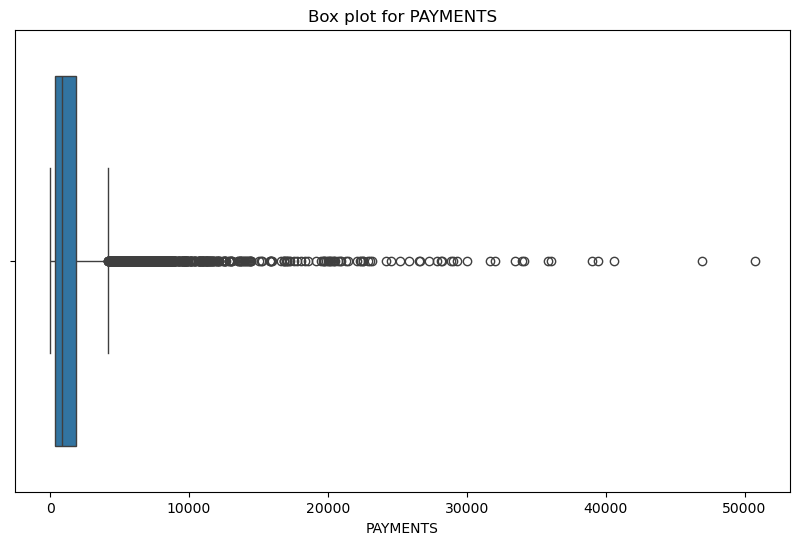

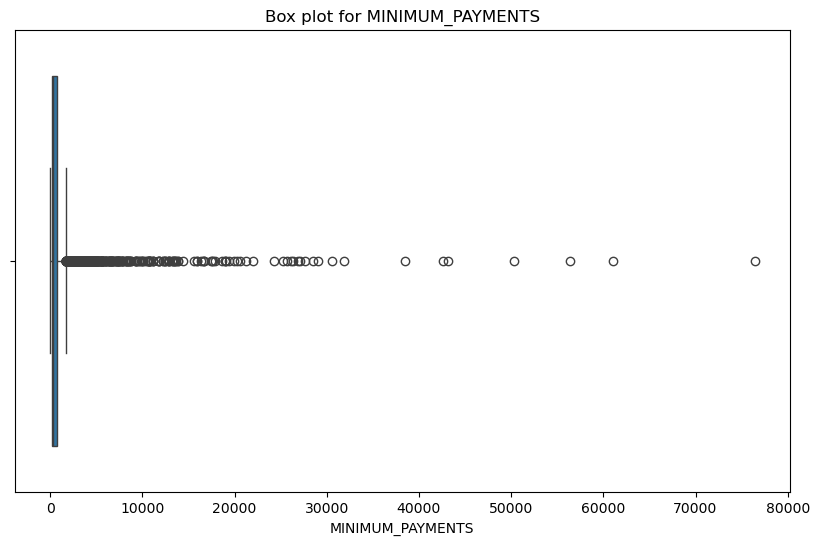

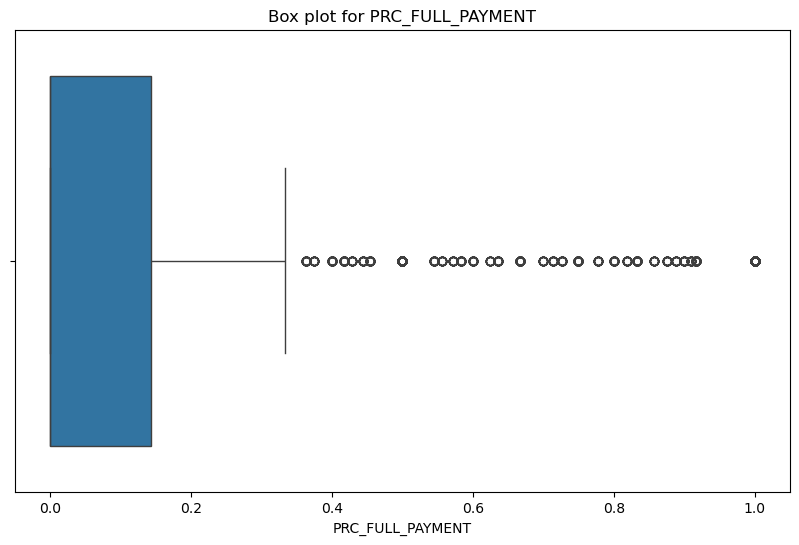

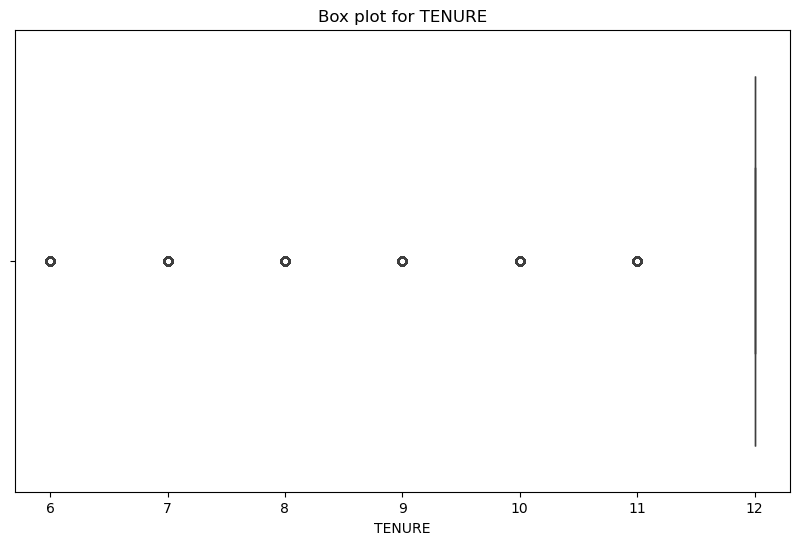

In [49]:
for column in x.columns:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x=x[column])  
    plt.title(f'Box plot for {column}')  
    plt.show()

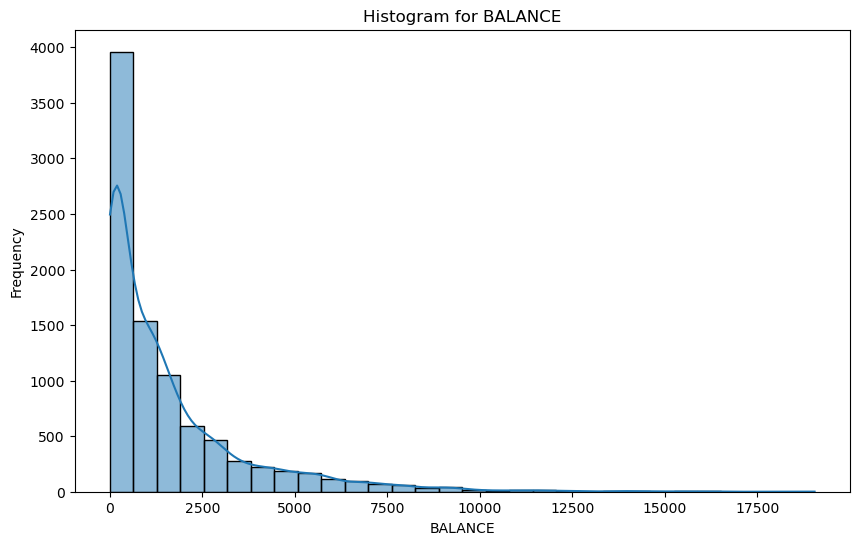

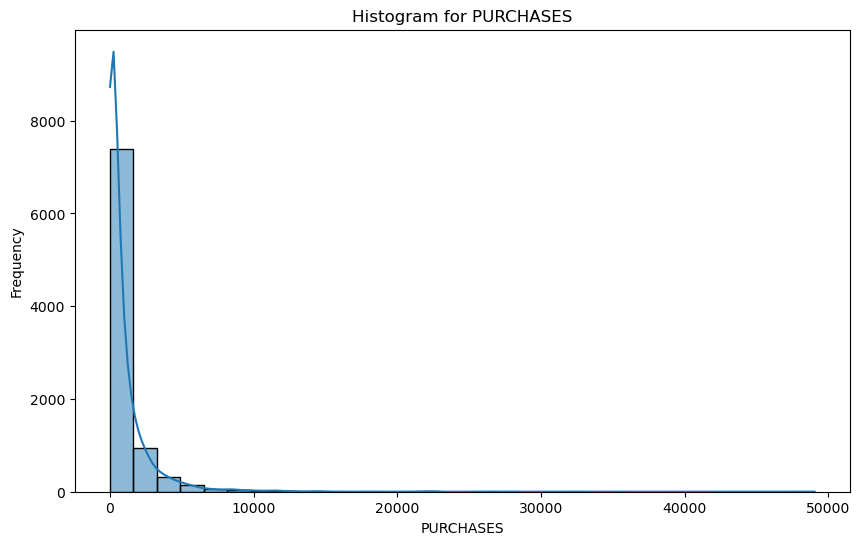

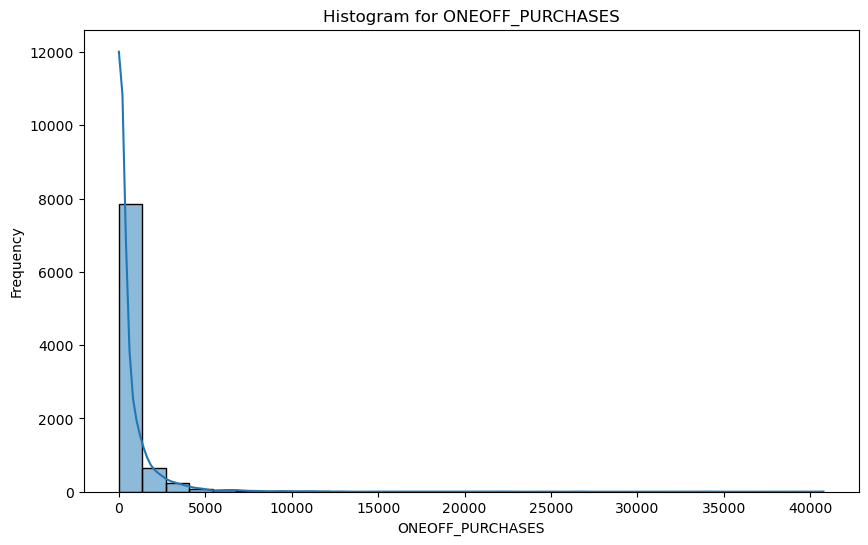

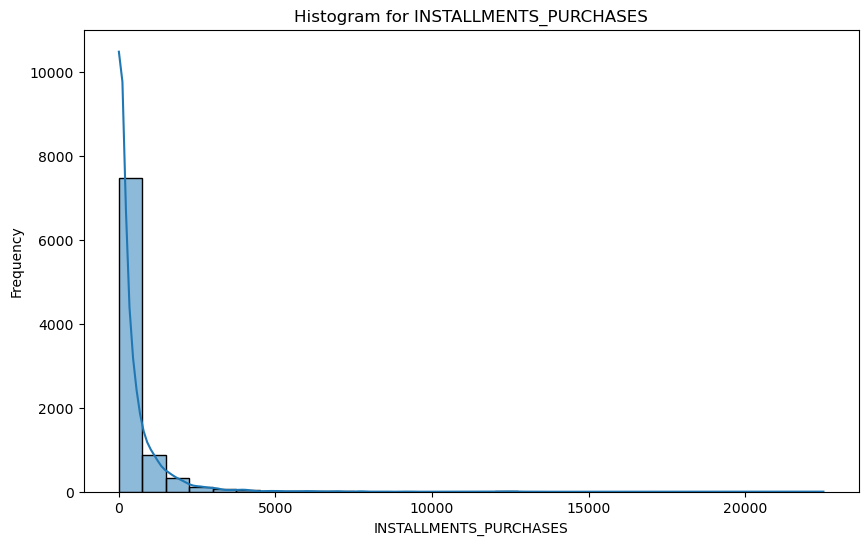

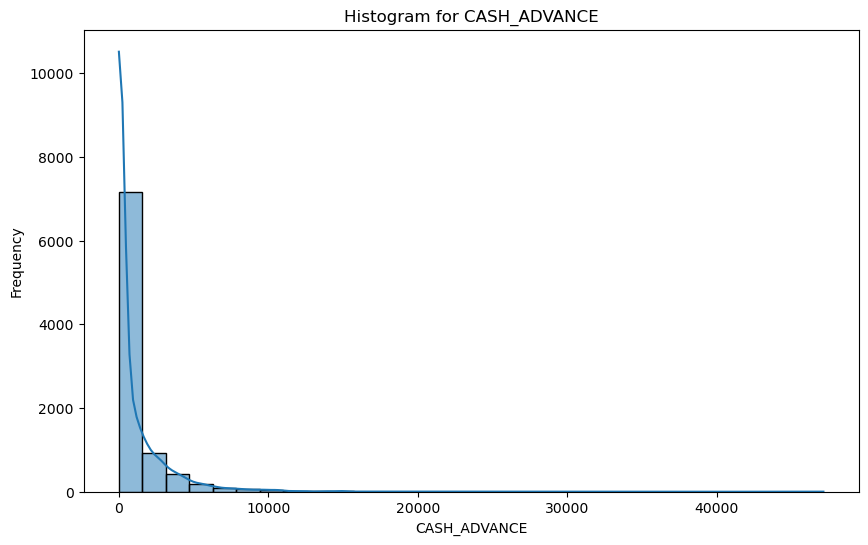

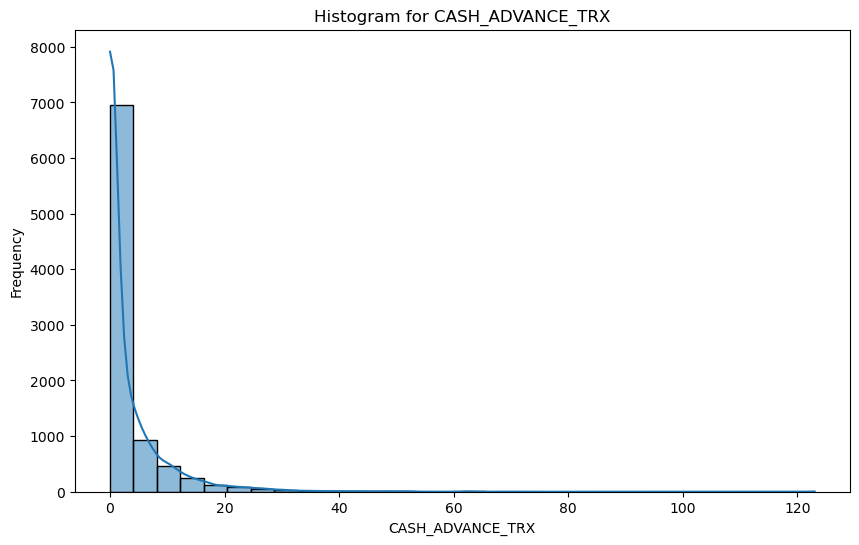

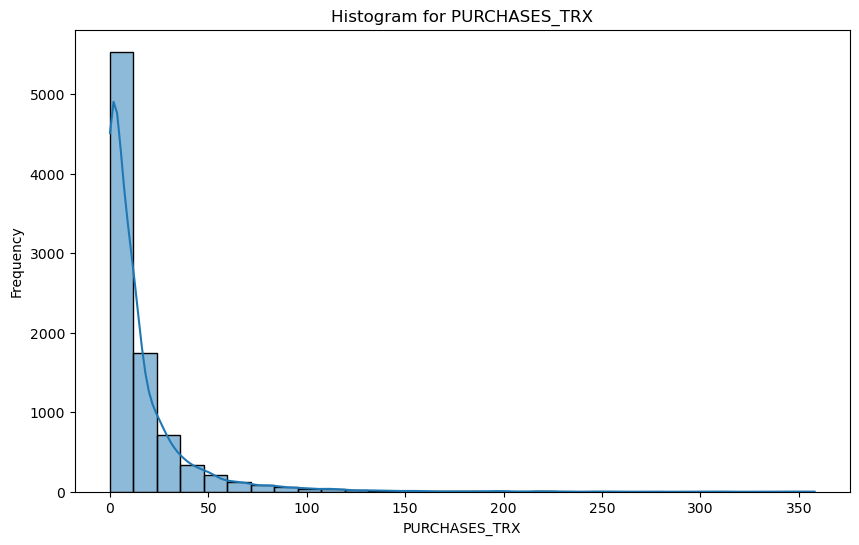

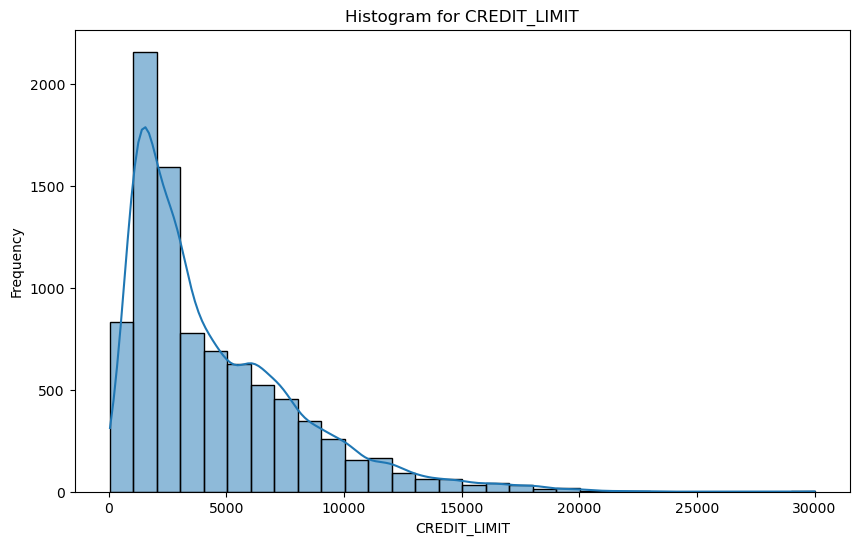

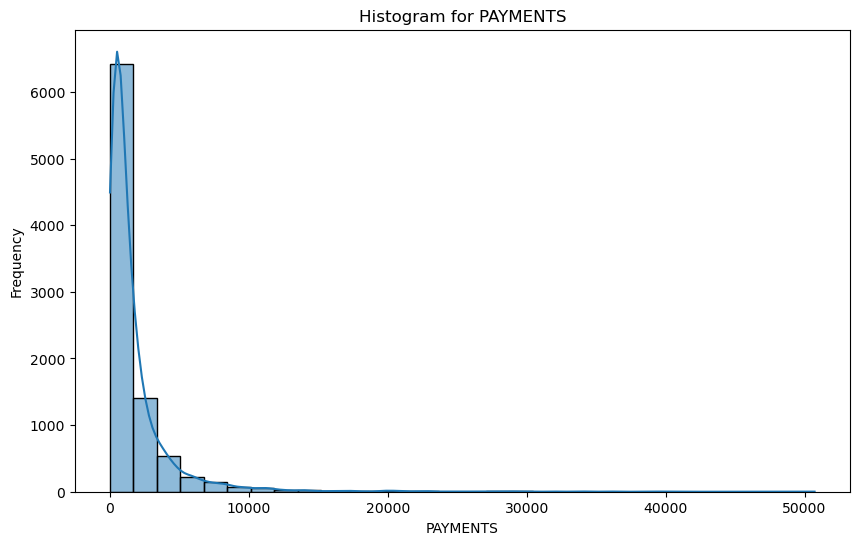

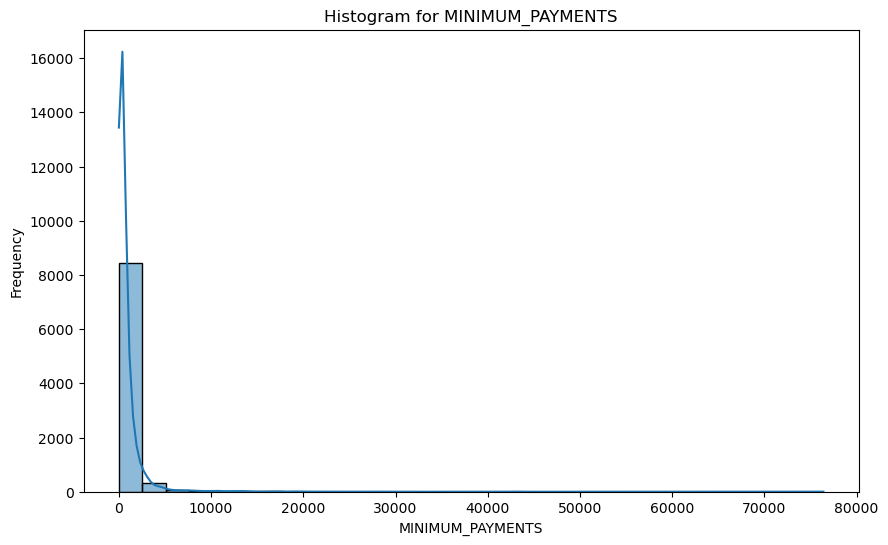

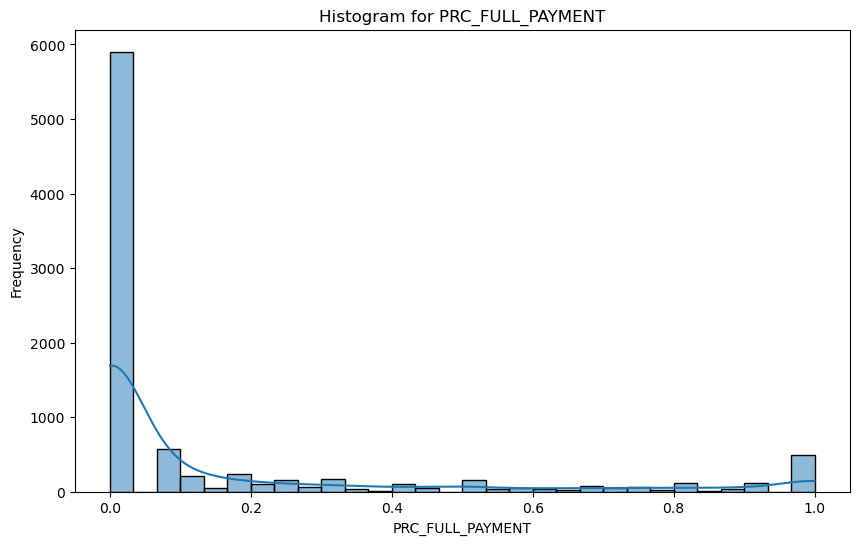

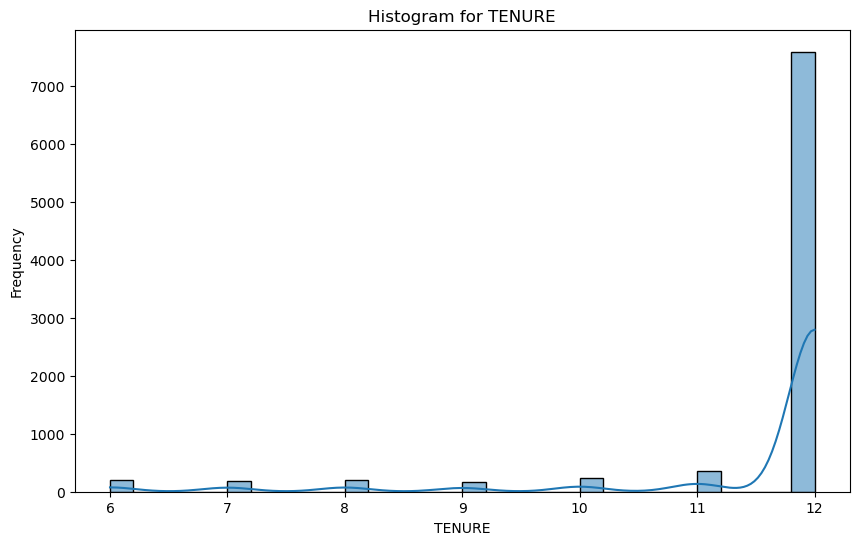

In [50]:
for column in x.columns:
    plt.figure(figsize=(10, 6)) 
    sns.histplot(data=x, x=column, kde=True, bins=30)  
    plt.title(f'Histogram for {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show()

In [51]:
columns_to_exclude = ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'TENURE']
columns_to_winsorize = []
for col in x:
    if col not in columns_to_exclude:
        columns_to_winsorize.append(col)
columns_to_winsorize

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS']

In [52]:
for col in x.columns:
        x[col] = np.log1p(x[col])

In [53]:
from feature_engine.outliers import Winsorizer

winsorizer = Winsorizer(capping_method = 'iqr',
                       tail = 'both',
                       fold = 1.5,
                       variables =columns_to_winsorize )
data = winsorizer.fit_transform(x)



In [54]:
data

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,4.568506,0.000000,4.568506,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.000000,0.000000,0.000000,8.770896,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,6.651791,6.651791,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,7.313220,7.313220,0.000000,5.331694,0.693147,0.693147,8.922792,3.552235,5.747647,0.000000,2.564949
4,6.707735,2.833213,2.833213,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...
8944,3.384170,5.677165,0.000000,5.677165,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910
8945,3.004851,5.707110,0.000000,5.707110,0.000000,0.000000,1.945910,6.908755,5.623517,5.747647,0.000000,1.945910
8946,3.194529,4.979489,0.000000,4.979489,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910
8947,2.671218,0.000000,0.000000,0.000000,3.625907,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910


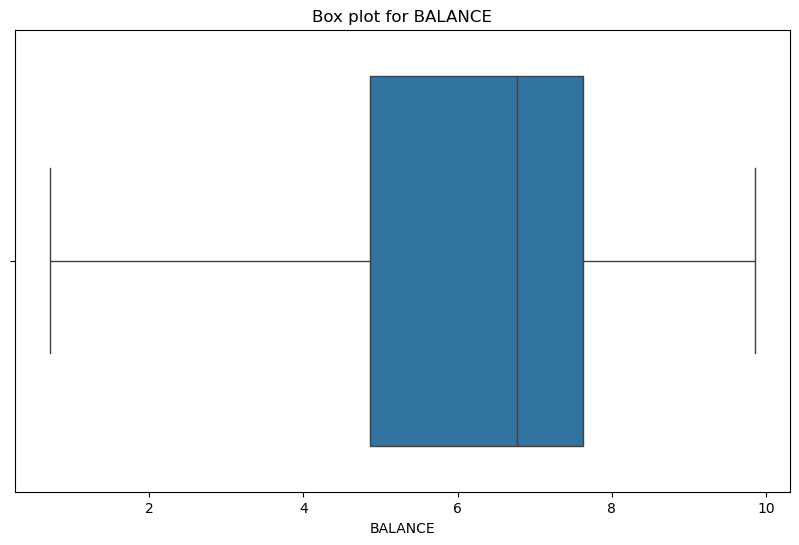

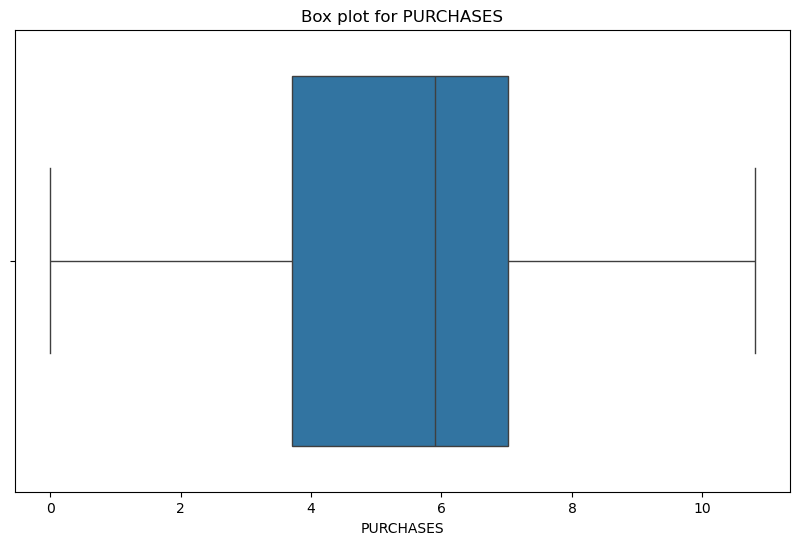

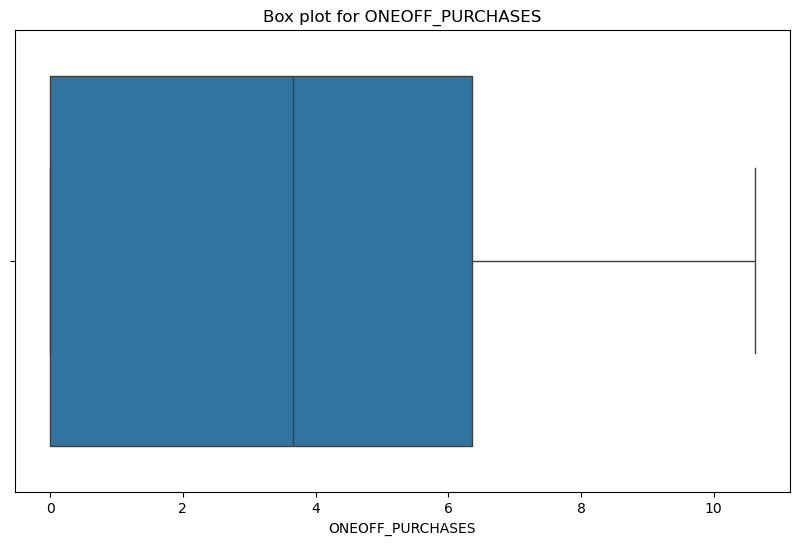

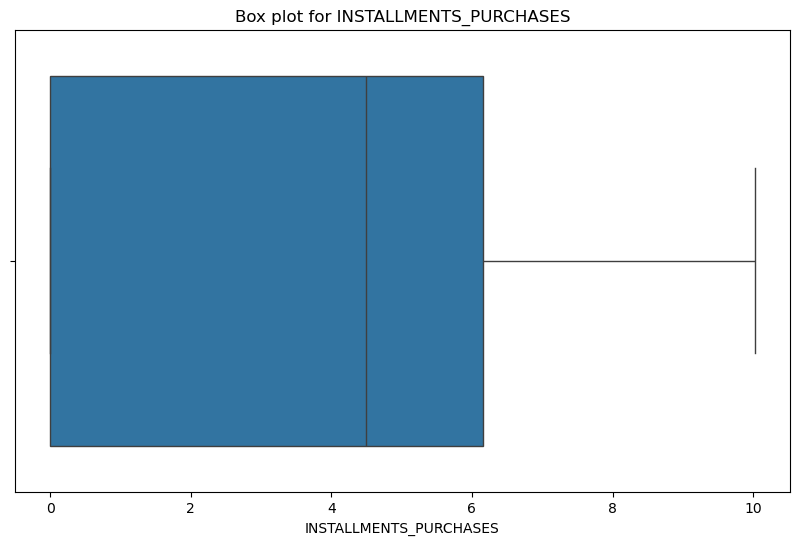

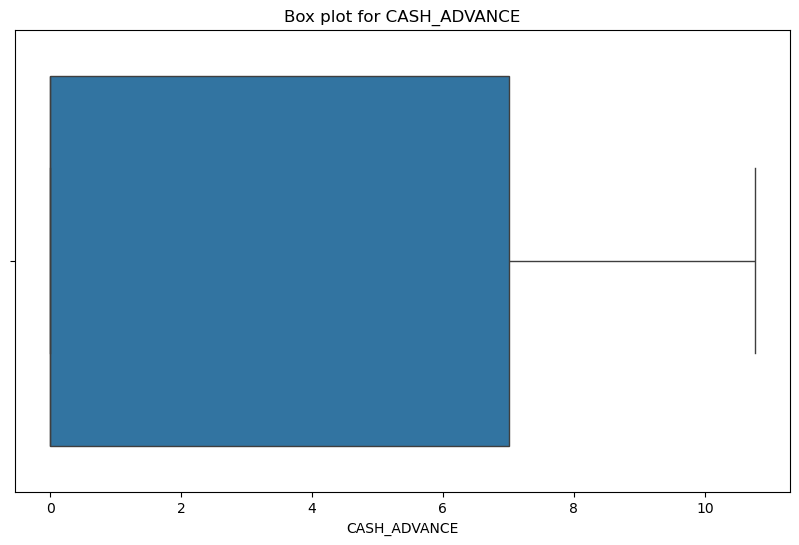

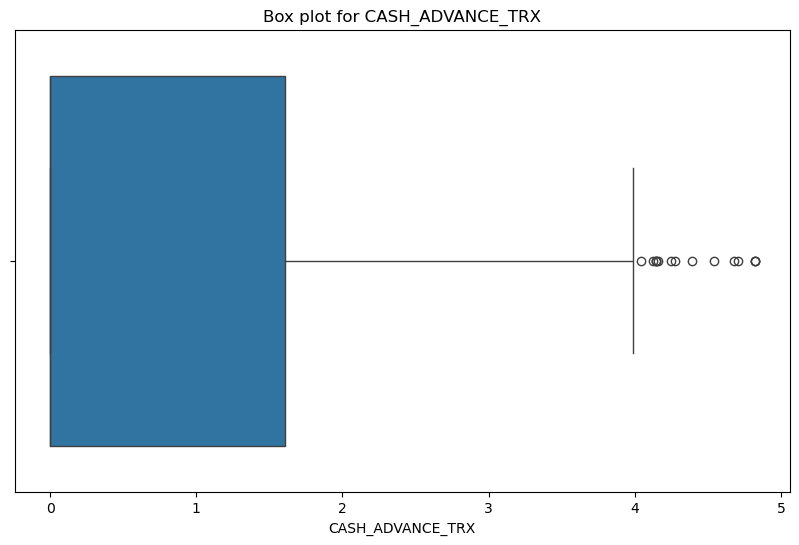

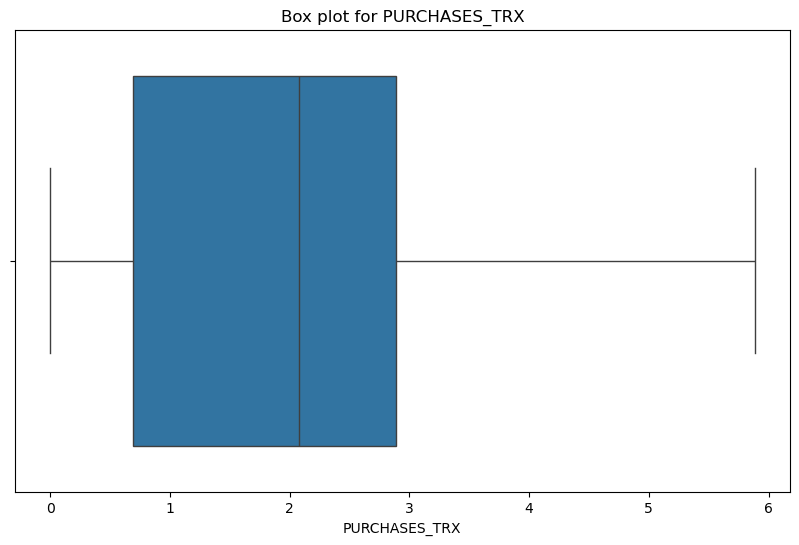

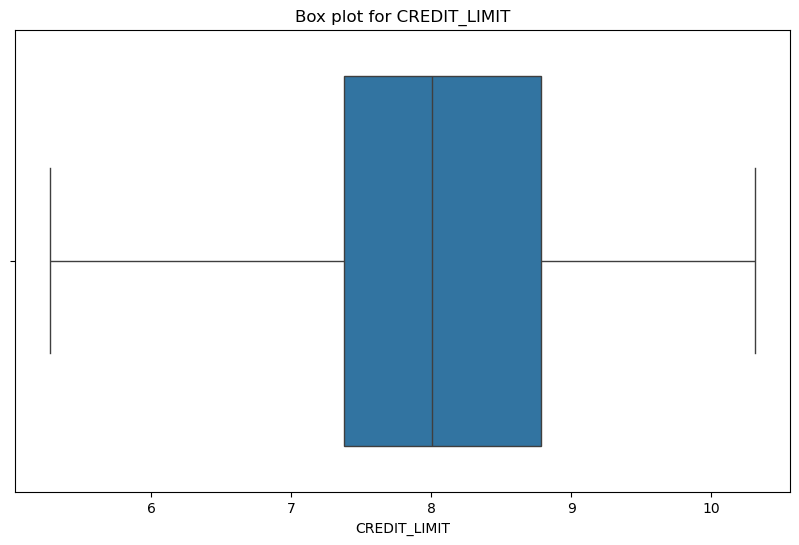

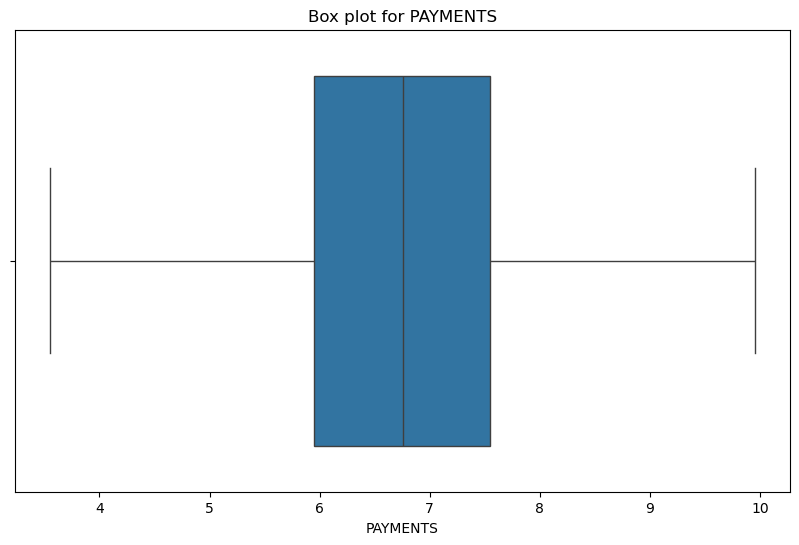

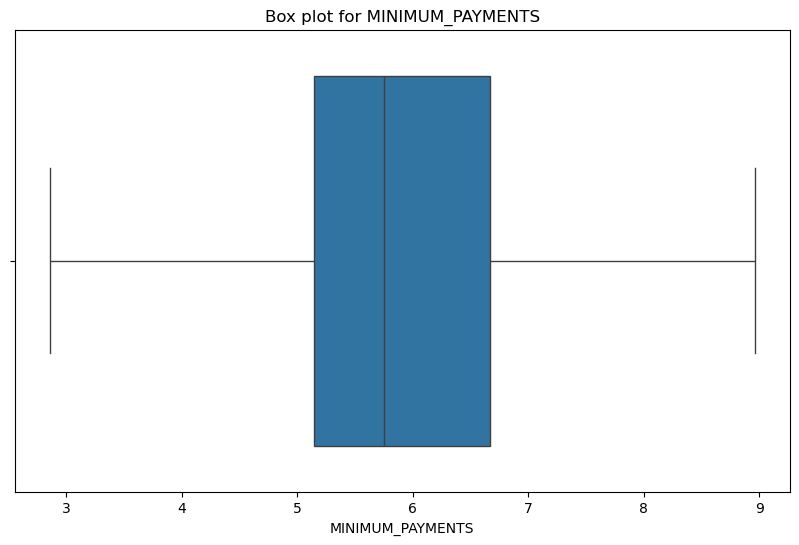

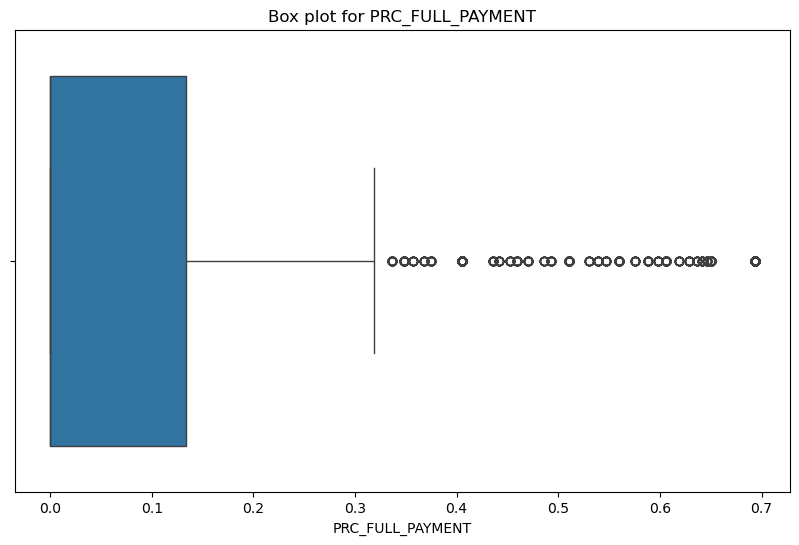

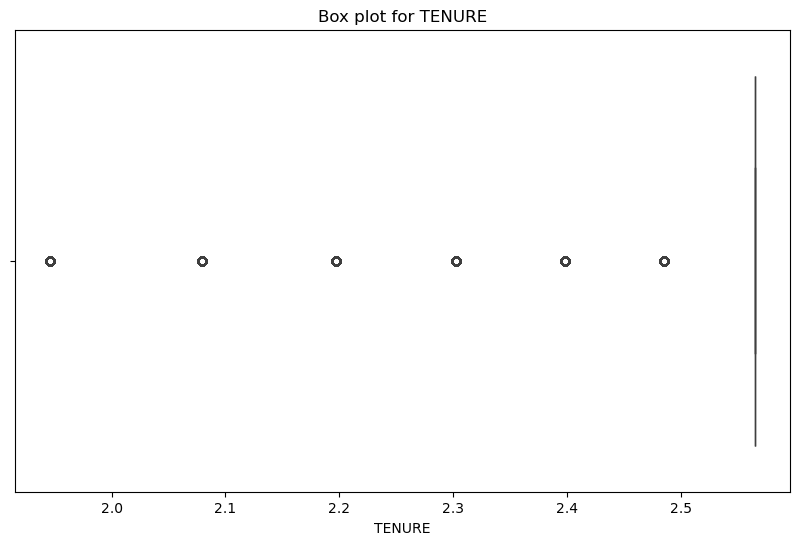

In [55]:
for column in x.columns:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x=data[column])  
    plt.title(f'Box plot for {column}') 
    plt.show()

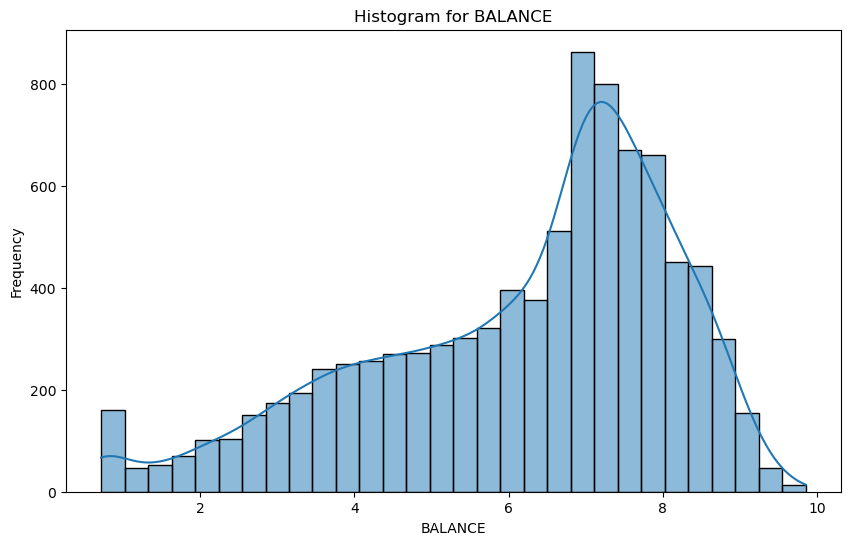

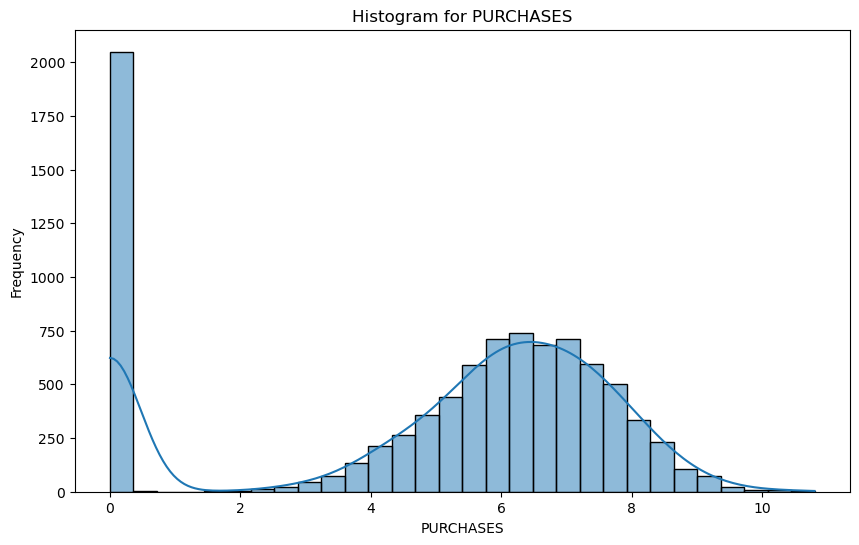

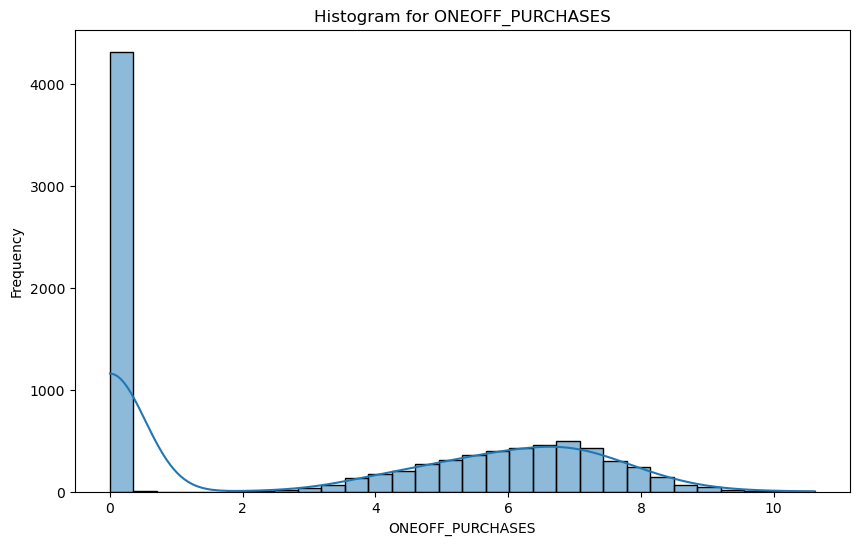

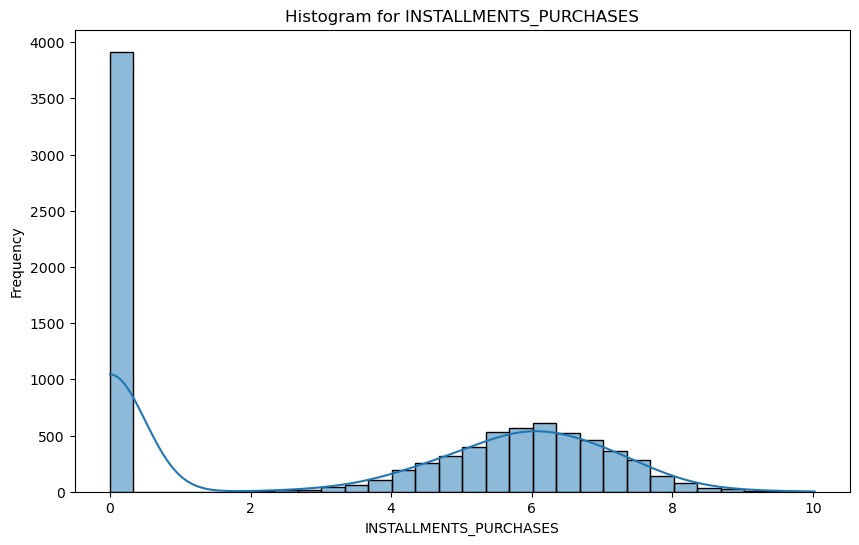

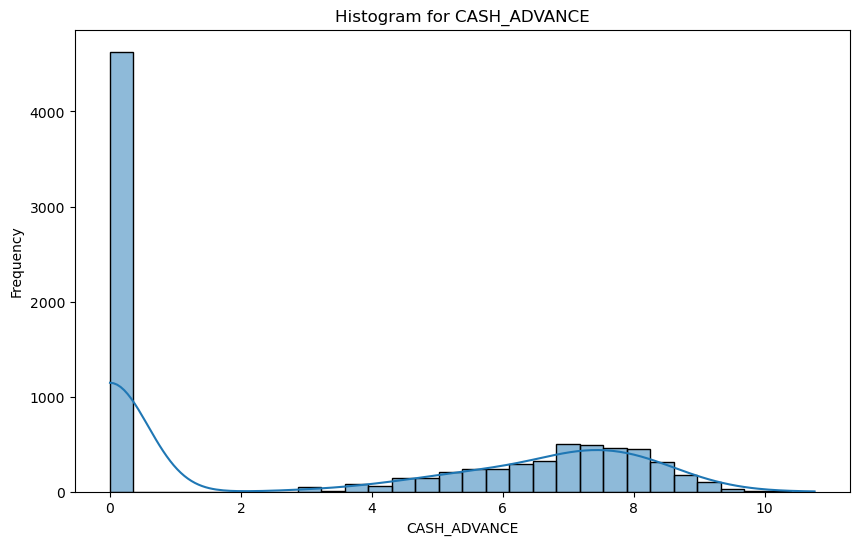

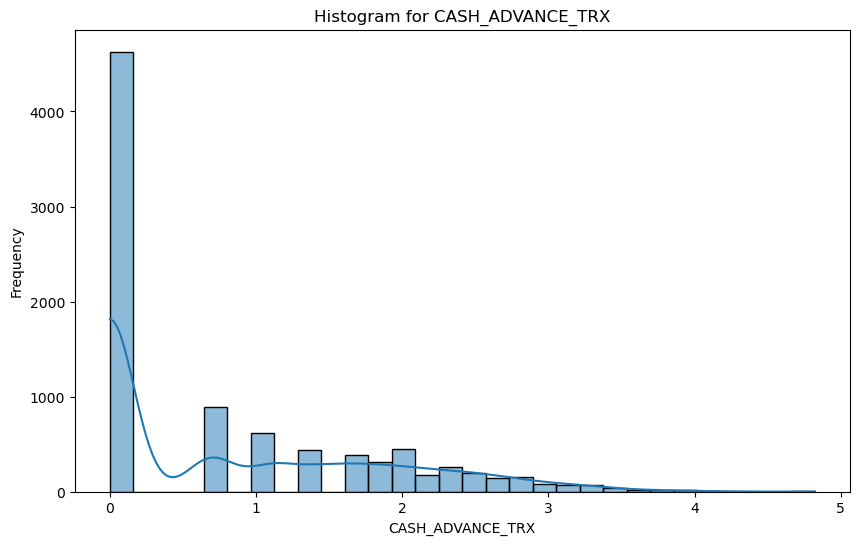

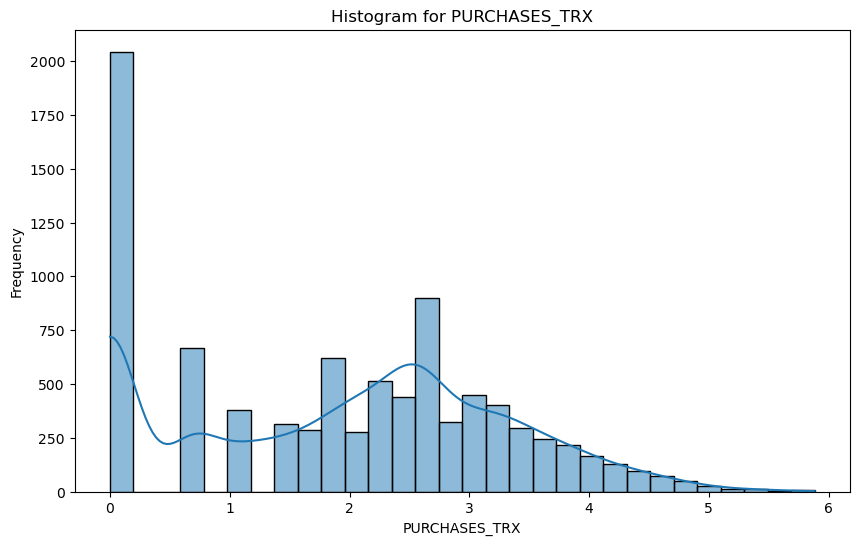

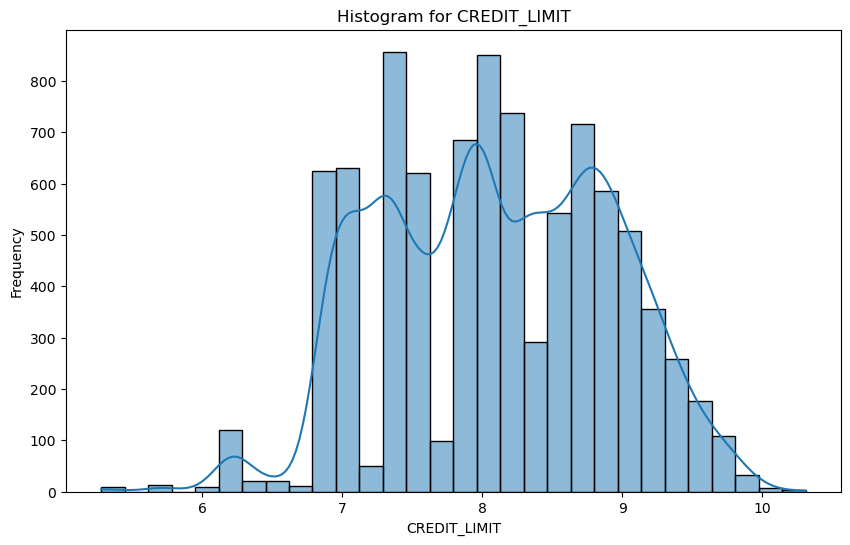

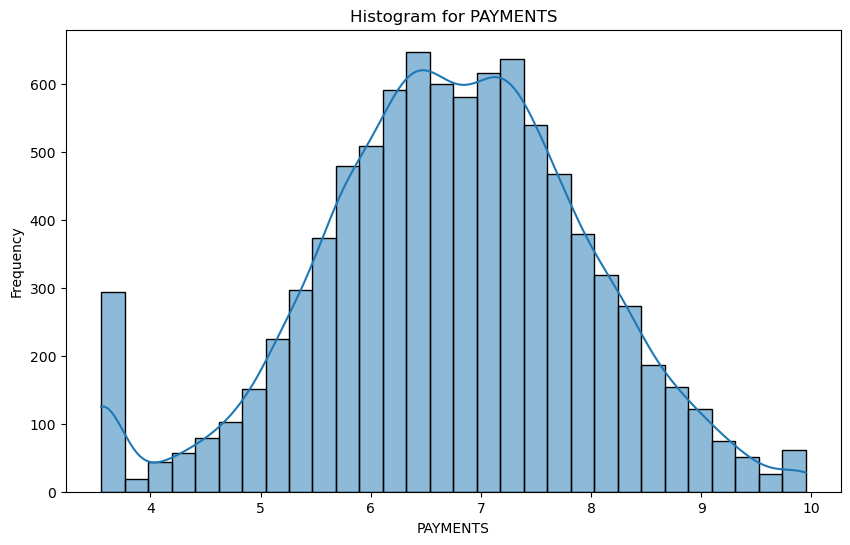

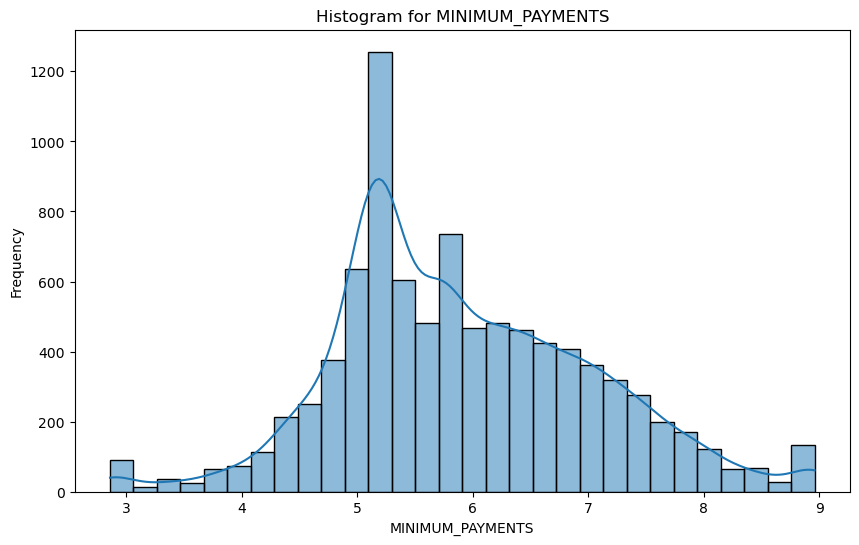

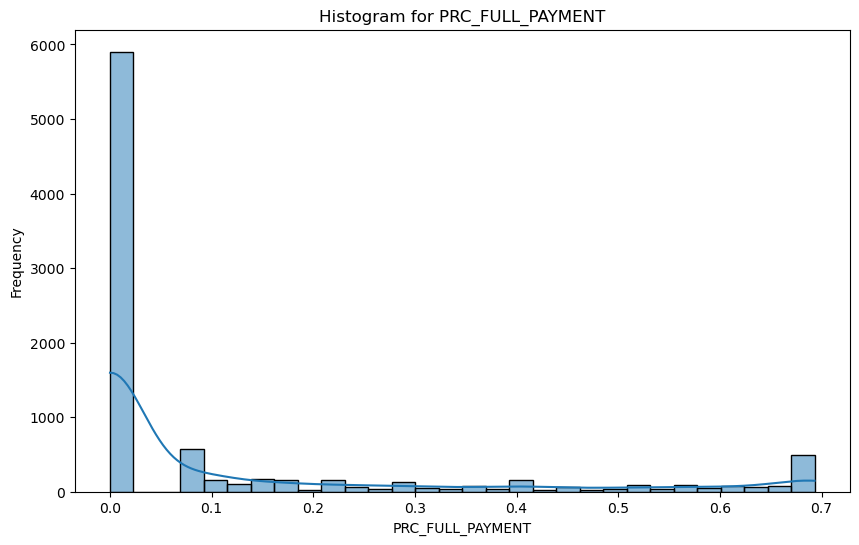

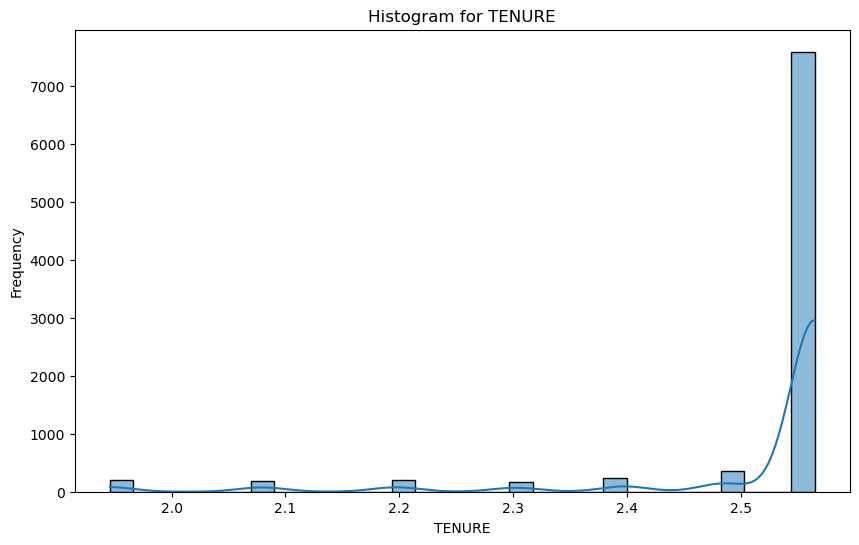

In [56]:
for column in x.columns:
    plt.figure(figsize=(10, 6))  
    sns.histplot(data=data, x=column, kde=True, bins=30) 
    plt.title(f'Histogram for {column}') 
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [57]:
data

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,4.568506,0.000000,4.568506,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.000000,0.000000,0.000000,8.770896,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,6.651791,6.651791,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,7.313220,7.313220,0.000000,5.331694,0.693147,0.693147,8.922792,3.552235,5.747647,0.000000,2.564949
4,6.707735,2.833213,2.833213,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...
8944,3.384170,5.677165,0.000000,5.677165,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910
8945,3.004851,5.707110,0.000000,5.707110,0.000000,0.000000,1.945910,6.908755,5.623517,5.747647,0.000000,1.945910
8946,3.194529,4.979489,0.000000,4.979489,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910
8947,2.671218,0.000000,0.000000,0.000000,3.625907,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910


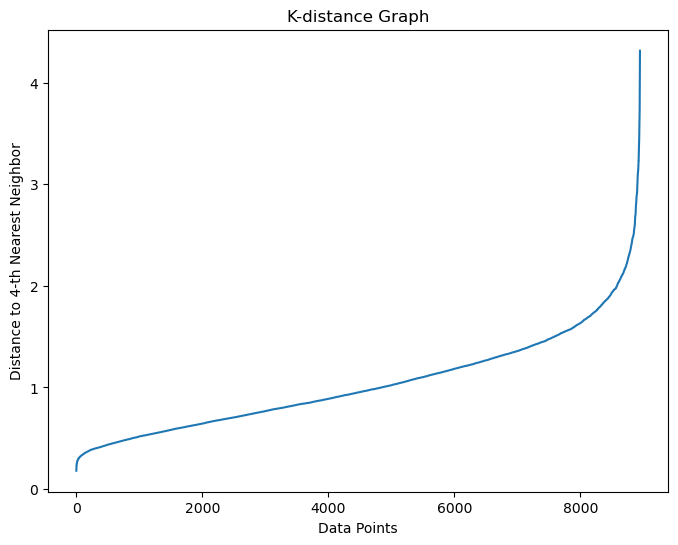

In [58]:
from sklearn.neighbors import NearestNeighbors
k = 4  
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(data)
distances, indices = neighbors.kneighbors(data)

distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Data Points")
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.show()

In [27]:

from sklearn.metrics import silhouette_score
eps_values = np.arange(0.1, 5, 0.1) 
min_samples_values = range(5, 20)  

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        
        if len(set(labels)) > 1:  
            score = silhouette_score(data, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples} with Silhouette Score: {best_score}")

Best eps: 2.1, Best min_samples: 7 with Silhouette Score: 0.45796268952091007


In [401]:
#This code is to find best EPS and Best Min_Samples value with the help of partial dataset

# import pandas as pd
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# import numpy as np
# from joblib import Parallel, delayed

# # Sample a subset of the dataset (e.g., 10% of the data)
# data_sampled = data.sample(frac=0.4, random_state=42)  # Adjust the fraction as needed

# # Define the grid search range for eps and min_samples
# eps_values = np.arange(0.1, 5, 0.1)
# min_samples_values = range(5, 20)

# def evaluate_dbscan(eps, min_samples, data):
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = dbscan.fit_predict(data)
    
#     # Skip the iteration if there is only one cluster or if it includes too many noise points
#     if len(set(labels)) > 1:  
#         score = silhouette_score(data, labels)
#         return eps, min_samples, score
#     else:
#         return eps, min_samples, -1  # Returning a negative score for invalid combinations

# # Parallel grid search on the sampled data
# results = Parallel(n_jobs=-1)(delayed(evaluate_dbscan)(eps, min_samples, data_sampled) 
#                               for eps in eps_values for min_samples in min_samples_values)

# # Extract the best result
# best_score = -1
# best_eps = 0
# best_min_samples = 0
# for eps, min_samples, score in results:
#     if score > best_score:
#         best_score = score
#         best_eps = eps
#         best_min_samples = min_samples

# print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples} with Silhouette Score: {best_score}")


Best eps: 2.4000000000000004, Best min_samples: 5 with Silhouette Score: 0.45334299357866015


In [59]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.1, min_samples=7)
db.fit_predict(data)
labels = db.labels_


In [60]:
df['Cluster'] = labels
df

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,312.452292,0.000000,12,6
4,C10005,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,C19186,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8945,C19187,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,312.452292,0.000000,6,0
8946,C19188,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8947,C19189,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.250000,6,1


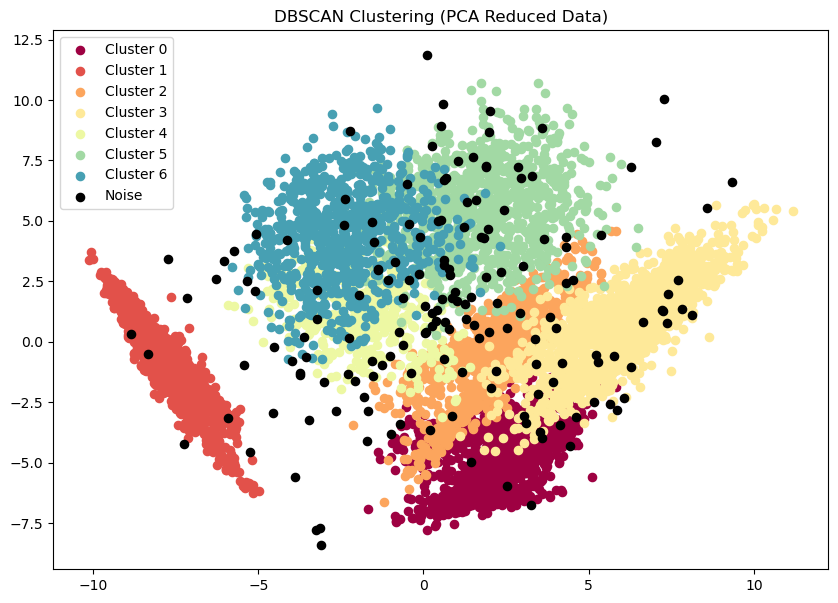

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 dimensions with PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

# Plot the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 7))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise points

    class_members = (labels == k)
    plt.scatter(data_reduced[class_members, 0], data_reduced[class_members, 1], c=[col], label=f"Cluster {k}" if k != -1 else "Noise", s=35)

plt.title("DBSCAN Clustering (PCA Reduced Data)")
plt.legend()
plt.show()


In [62]:
from sklearn import metrics
metrics.silhouette_score(data, labels)

0.45796268952091007